In [130]:
import pandas as pd
import re
import numpy as np

I am importing the csv. I could also use Urllib to pull form url but I like csv's. I limited the rows as I kept getting an error in row 131,000.

In [134]:

badstuff= pd.read_csv('Crimes.csv',engine='python',error_bad_lines=False, index_col='INC NUMBER')

Skipping line 131678: unexpected end of data


I wanted all the columns to be lower case and spaces to be replaced by _. I used this replace method for it.

In [135]:
badstuff.columns = badstuff.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

I am going to see the info and describe methods to get a better idea of the data.

In [136]:
badstuff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131676 entries, 201600000052855 to 201700002030009
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   occurred_on         131360 non-null  object 
 1   occurred_to         93174 non-null   object 
 2   ucr_crime_category  131676 non-null  object 
 3   100_block_addr      131676 non-null  object 
 4   zip                 131673 non-null  float64
 5   premise_type        130919 non-null  object 
dtypes: float64(1), object(5)
memory usage: 7.0+ MB


After performing the describe, I realize its the only column with floats. Hence why its the only one that appears. 

In [137]:
badstuff.describe()

,zip
count,131673.000000
mean,85045.098289
std,72.009780
min,85003.000000
25%,85016.000000
50%,85027.000000
75%,85041.000000
max,85396.000000


I want to see how many different zip codes and different places their are for this data. 

In [138]:
badstuff.zip.value_counts()

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85248.0       1
85233.0       1
85226.0       1
85204.0       1
85212.0       1
Name: zip, Length: 98, dtype: int64

In [139]:
badstuff.premise_type.value_counts()

SINGLE FAMILY HOUSE                    25329
APARTMENT                              14957
PARKING LOT                            14148
STREET / ROADWAY / ALLEY / SIDEWALK    11596
RETAIL BUSINESS                        10852
                                       ...  
FARM FACILITY                              3
GAMBLING FACILITY/CASINO/RACE TRACK        2
LAKE / WATERWAY / BEACH                    1
REST AREA                                  1
TRIBAL LANDS                               1
Name: premise_type, Length: 93, dtype: int64

Now I want to sort the data. I am going to sort based on place.


In [140]:
badstuff.sort_values(by=['premise_type','ucr_crime_category'])

,occurred_on,occurred_to,ucr_crime_category,100_block_addr,zip,premise_type
INC NUMBER,,,,,,
201700001438721,08/17/2017 04:45,NaN,AGGRAVATED ASSAULT,28XX E THOMAS RD,85008.0,ABANDONED/CONDEMNED STRUCTURE
201700001592053,09/10/2017 14:46,NaN,AGGRAVATED ASSAULT,27XX N 24TH ST,85006.0,ABANDONED/CONDEMNED STRUCTURE
201700002024523,11/17/2017 05:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043.0,ABANDONED/CONDEMNED STRUCTURE
201700001041461,05/25/2017 00:01,06/14/2017 19:00,BURGLARY,15XX W HATCHER RD,85021.0,ABANDONED/CONDEMNED STRUCTURE
201800001626635,07/01/2017 12:00,05/01/2018 12:00,BURGLARY,13XX S 40TH AVE,85009.0,ABANDONED/CONDEMNED STRUCTURE
...,...,...,...,...,...,...
201700000209468,02/04/2017 20:15,02/04/2017 20:19,ROBBERY,36XX W THOMAS RD,85009.0,NaN
201700000973263,06/04/2017 21:40,NaN,ROBBERY,N 36TH AVE & W EVA ST,85051.0,NaN
201700001432313,08/16/2017 03:43,08/16/2017 03:43,ROBBERY,N 7TH AVE & W COLTER ST,85013.0,NaN


I am going to look at the different premises and which types of crimes are most common in each.


In [141]:
places =badstuff.groupby('premise_type')

In [142]:
places.describe()

zip                ...                  
                                 count          mean  ...      75%      max
premise_type                                          ...                  
ABANDONED/CONDEMNED STRUCTURE      9.0  85025.333333  ...  85042.0  85051.0
ADULT ONLY STORE / MOVIE          62.0  85027.919355  ...  85034.0  85085.0
AIRPORT                          626.0  85034.164537  ...  85034.0  85255.0
AMUSEMENT PARK                    11.0  85093.363636  ...  85051.0  85310.0
APARTMENT                      14956.0  85030.026143  ...  85034.0  85396.0
...                                ...           ...  ...      ...      ...
TRAIN STATION                     22.0  85035.045455  ...  85034.0  85307.0
TRIBAL LANDS                       1.0  85043.000000  ...  85043.0  85043.0
UNKNOWN                          792.0  85049.345960  ...  85041.0  85395.0
VEHICLE                         6844.0  85051.372443  ...  85042.0  85392.0
WAREHOUSE / FACTORY              341.0  85030.571848  ...  85043.0  85339.0

[93 rows x 8 columns]

Import matplotlib to make graphs eventually

In [143]:
import matplotlib  as plot

Want to graph the 10 highest areas of crime in the Phoenix area.

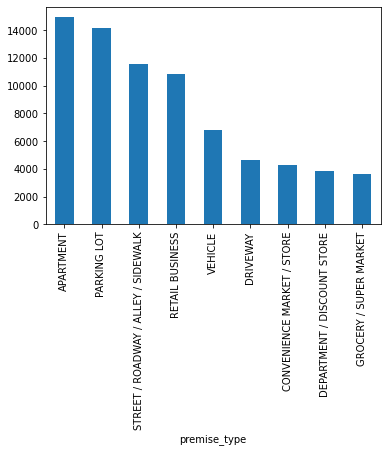

In [144]:
places.zip.count().sort_values(ascending=False).iloc[1:10].plot.bar()

Try and make a pie chart for crime in the top 10 areas of crime.

In [145]:
tally= places.zip.count().sort_values(ascending=False).iloc[1:10]

In [146]:
tally

premise_type
APARTMENT                              14956
PARKING LOT                            14148
STREET / ROADWAY / ALLEY / SIDEWALK    11596
RETAIL BUSINESS                        10852
VEHICLE                                 6844
DRIVEWAY                                4609
CONVENIENCE MARKET / STORE              4270
DEPARTMENT / DISCOUNT STORE             3822
GROCERY / SUPER MARKET                  3631
Name: zip, dtype: int64

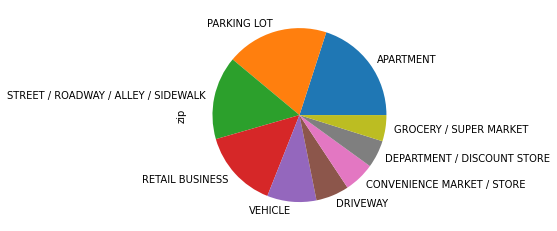

In [147]:
tally.plot.pie()

In [148]:
places.get_group('APARTMENT')

,occurred_on,occurred_to,ucr_crime_category,100_block_addr,zip,premise_type
INC NUMBER,,,,,,
201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031.0,APARTMENT
201500002102927,11/01/2015 04:00,11/01/2015 10:00,LARCENY-THEFT,176XX N 7TH ST,85022.0,APARTMENT
201500002126247,11/01/2015 05:00,11/02/2015 16:00,BURGLARY,17XX W DESERT COVE AVE,85029.0,APARTMENT
201500002101936,11/01/2015 09:43,NaN,DRUG OFFENSE,9XX S 17TH AVE,85007.0,APARTMENT
...,...,...,...,...,...,...
201700002023142,11/16/2017 20:45,NaN,AGGRAVATED ASSAULT,2XX W CLARENDON AVE,85013.0,APARTMENT
201700002024423,11/16/2017 21:00,11/17/2017 03:30,BURGLARY,38XX N 43RD AVE,85031.0,APARTMENT
201700002032068,11/17/2017 01:00,11/17/2017 06:00,MOTOR VEHICLE THEFT,200XX N 23RD AVE,85027.0,APARTMENT


In [149]:
places.get_group('APARTMENT').nunique()

occurred_on           13034
occurred_to           10694
ucr_crime_category        9
100_block_addr         2714
zip                      62
premise_type              1
dtype: int64

Isolate the counts of crime category and graph it.

In [150]:
places.get_group('APARTMENT').groupby('ucr_crime_category').zip.count()

ucr_crime_category
AGGRAVATED ASSAULT                       2167
ARSON                                      46
BURGLARY                                 3895
DRUG OFFENSE                              563
LARCENY-THEFT                            5517
MOTOR VEHICLE THEFT                      1861
MURDER AND NON-NEGLIGENT MANSLAUGHTER      44
RAPE                                      522
ROBBERY                                   341
Name: zip, dtype: int64

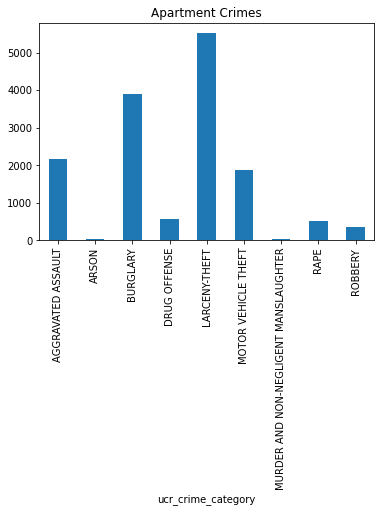

In [151]:
places.get_group('APARTMENT').groupby('ucr_crime_category').zip.count().plot.bar(title='Apartment Crimes')